#### Question 4

(a)
create two arrays to data
take slug as $x$, elevation as $y$
cal the $\beta_1$ and $\beta_2$ value

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
y = np.array([0.480,0.605,0.530,0.505,0.505,0.625,0.550
          ,0.510,0.570,0.5,0.535])
x = np.array([160,616,1050,130,20,5277,350,63,465,10,566])
x_bar = np.mean(x)
y_bar = np.mean(y)
n = x.shape[0]

Sxx = np.sum(np.square(x)) - n*x_bar*x_bar
Sxy = np.sum(x*y) - n*x_bar*y_bar

beta_1 = Sxy/Sxx
beta_0 = y_bar - beta_1*x_bar

print('beta_0 is ', beta_0)
print('beta_1 is ', beta_1)

beta_0 is  0.5207848203039731
beta_1 is  2.140426974345895e-05


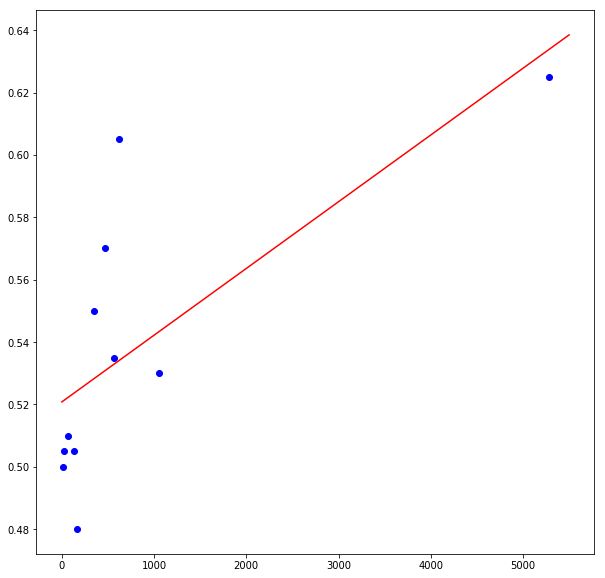

In [16]:
plt.figure(figsize = (10, 10))
# create a point plot
plt.plot(x, y, 'bo')
plt.plot([0, 5500], [beta_1*x + beta_0 for x in [0, 5500]], 'r')
plt.show()

(b) 
test the null hypothesis with T test that the slope $\beta_1 = 0$, and the alternate $\beta_1 \neq 0$

$H_0: \beta_1 = 0$ Null hypothesis

$H_1: \beta_1 \neq 0$ Alternatee hypothesis

In [17]:
SSE = 0
for i in range(len(x)):
    SSE += (y[i] - beta_0 - beta_1*x[i])**2

sigma_est = (SSE / (len(x) - 2))**0.5
SE_b_1 = (sigma_est**2 / Sxx)**0.5
t = (beta_1 - 0) / SE_b_1
print('t is ', t)

t is  3.0195982888864057


By checking the T table, with $df = 11 - 2 = 9, a = 0.01\Rightarrow t_{0.01,9}=2.821$

Because $t>t_{0.01,9}$, reject the null hypothesis. Conclude that $\beta_1$ is contributing to $\hat{y}$

(c) draw the least squares line

0.010465498967051274


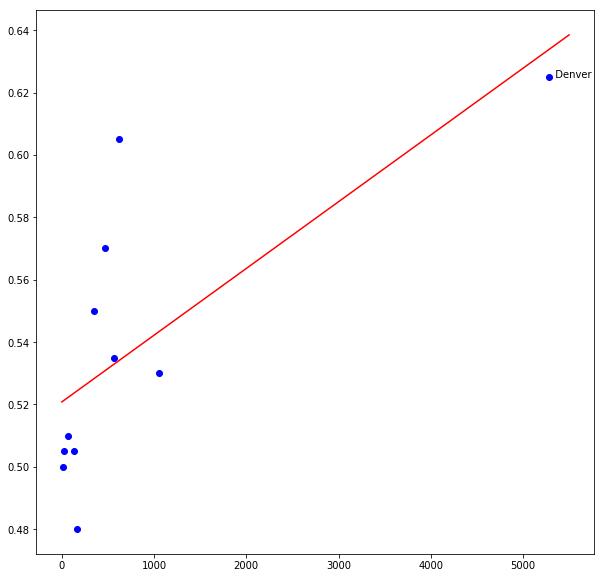

In [28]:
plt.figure(figsize = (10, 10))
# create a point plot
plt.plot(x, y, 'bo')
plt.plot([0, 5500], [beta_1*x + beta_0 for x in [0, 5500]], 'r')
plt.annotate('  Denver', (x[5], y[5]))
plt.show()

I found that the data from Denver has a large shift from other points. It could be a data error and affect the model.

(d) remove Denver

beta_0 is  0.5070435999035114
beta_1 is  6.401282826964629e-05
t is  1.969872195962768


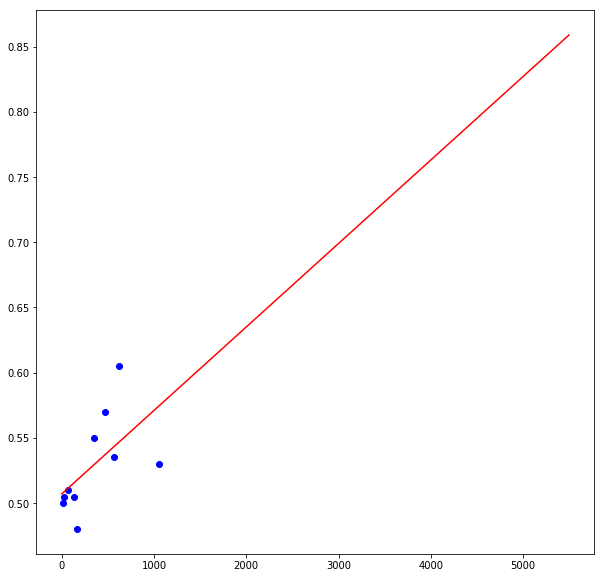

In [29]:
y = np.array([0.480,0.605,0.530,0.505,0.505,0.550
          ,0.510,0.570,0.5,0.535])
x = np.array([160,616,1050,130,20,350,63,465,10,566])
x_bar = np.mean(x)
y_bar = np.mean(y)
n = x.shape[0]

Sxx = np.sum(np.square(x)) - n*x_bar*x_bar
Sxy = np.sum(x*y) - n*x_bar*y_bar

beta_1 = Sxy/Sxx
beta_0 = y_bar - beta_1*x_bar

print('beta_0 is ', beta_0)
print('beta_1 is ', beta_1)
SSE = 0
for i in range(len(x)):
    SSE += (y[i] - beta_0 - beta_1*x[i])**2

sigma_est = (SSE / (len(x) - 2))**0.5
SE_b_1 = (sigma_est**2 / Sxx)**0.5
t = (beta_1 - 0) / SE_b_1
print('t is ', t)
plt.figure(figsize = (10, 10))
# create a point plot
plt.plot(x, y, 'bo')
plt.plot([0, 5500], [beta_1*x + beta_0 for x in [0, 5500]], 'r')
plt.show()

After removing Denver's data, we have $t=1.97<t_{0.01,9}$. So we fail to  reject $H_0$ which means that $\beta_1$ is not contributing to $\hat{y}$. The elevation has no effect on slugging percentage.

---

#### Question 5

In [46]:
import pandas as pd
import statsmodels.api as sm
# from sklearn.model_seletcion import train_test_split
boston_df = pd.read_excel('./BostonHousingData.xlsx', sheet_name = 'HousingData')
boston_df

ModuleNotFoundError: No module named 'statsmodels'

In [42]:
# target = boston_df
# for col in boston_df.columns:
#     print(col)

In [43]:
x=boston_df['LSTAT'].to_numpy()
y=boston_df['MEDV'].to_numpy()

# x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=50)
n = x.shape[0]

x_bar = np.mean(x)
y_bar = np.mean(y)

S_x_x = np.sum(np.square(x)) - n*x_bar*x_bar
S_x_y = np.sum(x*y) - n*x_bar*y_bar

beta_1 = S_x_y/S_x_x
beta_0 = y_bar - beta_1*x_bar

print('beta_0 is ', beta_0)
print('beta_1 is ', beta_1)

beta_0 is  34.553840879383145
beta_1 is  -0.950049353757994


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

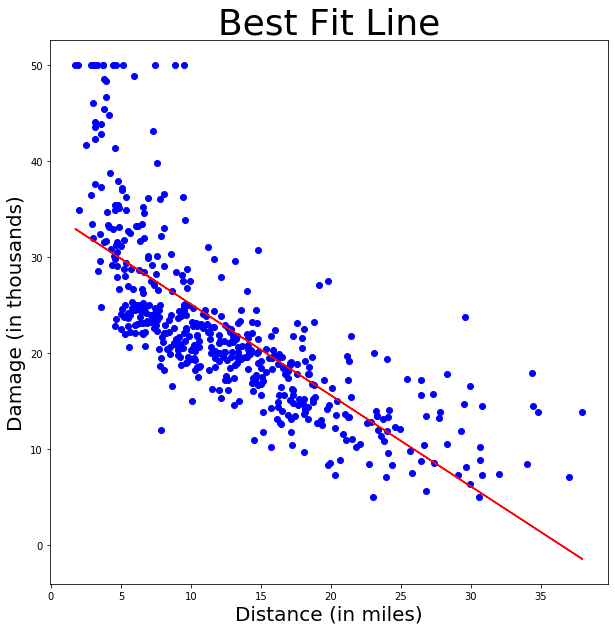

In [44]:
# %matplotlibe inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(x, y, 'bo')
plt.plot(x, [beta_1*z + beta_0 for z in x], 'r-')

plt.title('Best Fit Line', fontsize=36)
plt.xlabel('Distance (in miles)', fontsize=20)
plt.ylabel('Damage (in thousands)', fontsize=20)

plt


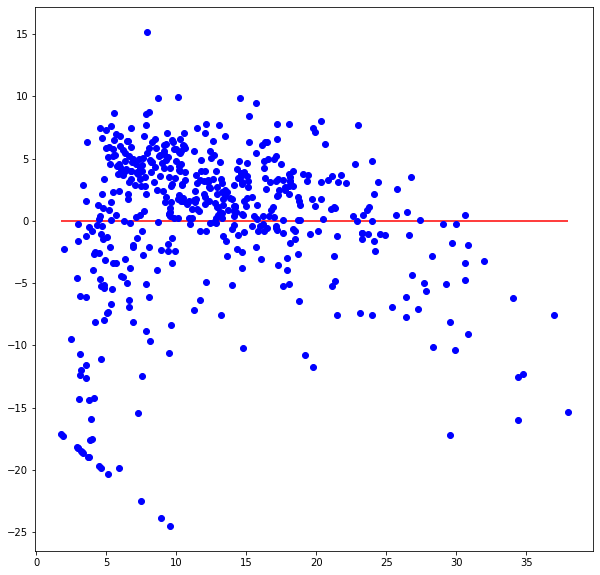

In [45]:
# confidence interval
# null hypotheses test
# statsmodel.api
expect=np.array([beta_1*z + beta_0 for z in x])
error=expect-y
plt.figure(figsize=(10,10))
plt.plot(x, error, 'bo')
# plt.plot(x,[0*len(x)],'r-')
plt.hlines(0,min(x),max(x),'r')

In [ ]:
# 2 simple liner regression
# 1 mulipule liner regression
# 1 not liner regression
# find the r^2 closet to 1
# x_train =sm.add_constant(X_train)
# model=sm.OLS(Y_train,X_train).fit()
# s=model.summary
# print(s)
